# Анализ рынка компьютерных игр

«Стримчик» - интернет-магазин, который продаёт по всему миру компьютерные игры.
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные 2016 года. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st
### Убираем предупреждения
warnings.filterwarnings("ignore")

### Приводим цифры к читаемому формату. Без экспоненциальной записи
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Показываем все столбцы
pd.options.display.max_columns = None

In [62]:
df = pd.read_csv('/datasets/games.csv')

In [63]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [64]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Приведем все названия столбцов к нижнему регистру. В данных имеются пропуски, заполнить мы их можем только нулем. Столбец с годом релиза необходимо поменять тип данных на целочисленный. В столбце с оценкой пользователей, необходимо поменять тип данных на числа с плавающей запятой. 

## Предобработка данных

In [65]:
df.columns = df.columns.str.lower()

df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')

df.loc[df.user_score == 'tbd', 'user_score'] = 0
df['user_score'] = df['user_score'].fillna(0).astype('float')

df['critic_score'] = df['critic_score'].fillna(0)

df['rating'] = df['rating'].fillna('Неизвестно')

df['world_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.00,0.00,Неизвестно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.00,0.00,Неизвестно,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.00,0.00,Неизвестно,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.00,0.00,Неизвестно,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.00,0.00,Неизвестно,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.00,0.00,Неизвестно,0.01


Заменили названия столбцов. Преобразовали столбцы: год релиза в целочисленный, оценки пользователей в числа с плавающей запятой. Заполнили пропуски нулями. Оценки критиков и пользователей невозможно заполнить, на них могут сильно повлиять проблемы самой игры, такие как баги, сюжет, геймплей. Рейтинг так же невозможно заполнить, буквально одна сцена может перевести игру из рейтинга «Для детей младшего возраста» в «Для подростков».

Посчитали суммарные продажи всех регионов и записали в новый столбец.


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы.

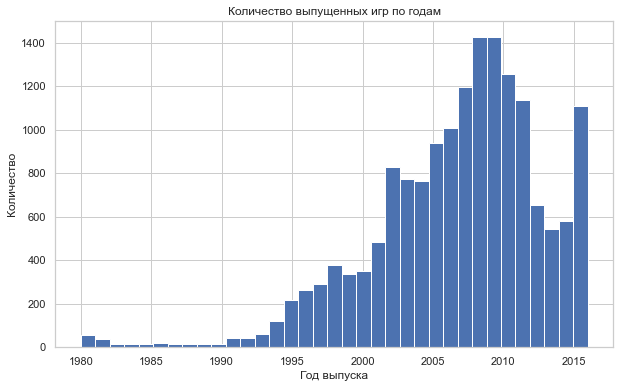

In [66]:
plt.figure(figsize =(10, 6))
sns.set(style="whitegrid")
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.hist(df[df['year_of_release'] > 0]['year_of_release'], bins=35)
plt.show()

На графике видно, что начиная с 1995 года наблюдается сильный рост количества выпускаемых игр. В 2012-2014 годах наблюдается снижение выпуска игр. Возможная причина - анонс нового поколения игровых платформ и задержка разработки новых игр на эти платформы. 

### Как менялись продажи по платформам.

In [67]:
### Выберем топ 10 платформ по продажам.
platform_sales = (df
                  .groupby('platform')['world_sales'].agg('sum')
                  .sort_values(ascending=False)
                  .head(10)
                  .index)

### Возьмем все все продажи по платформам, в разбивке по годам.
platform_sales_years = (df
                  .groupby(['platform', 'year_of_release'])['world_sales']
                  .agg('sum')
                  .reset_index())

### Уберем пропущенные значения с годом релиза.
platform_sales_years = platform_sales_years.drop(platform_sales_years[platform_sales_years.year_of_release == 0].index)

### Выберем только продажи по годам тех платформ, которые входят в топ 10 по общим продажам.
platform_sales_years = platform_sales_years[platform_sales_years['platform'].isin(platform_sales)]

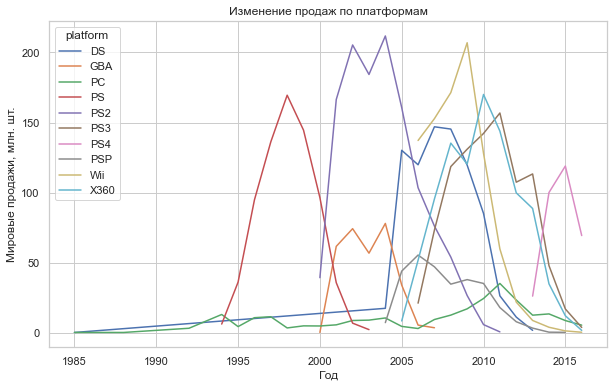

In [68]:
plt.figure(figsize =(10, 6))
sns.set(style="whitegrid")
sns.lineplot(
    data = platform_sales_years, 
    x = 'year_of_release', 
    y = 'world_sales', 
    hue='platform', 
    )
plt.ylabel('Мировые продажи, млн. шт.')
plt.xlabel('Год')
plt.title('Изменение продаж по платформам')
plt.show()

Из графика по платформам с наибольшими суммарными продажами, мы видим, что пик продаж приходится примерно на пятый год существования. Соответственно время жизни примерно 8 лет. Для планирования продаж достаточно будет взять данные с 2013 года.

###  Выбор нескольких потенциально прибыльных платформ.

In [69]:
actual_sales = df[df['year_of_release'] > 2012]

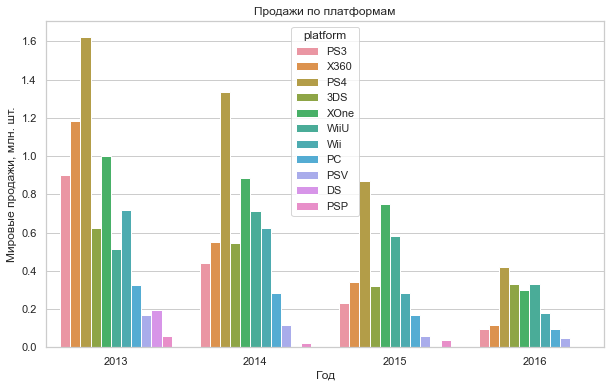

In [70]:
plt.figure(figsize =(10, 6))
sns.set(style="whitegrid")
g = sns.barplot(
    data = actual_sales, 
    x = 'year_of_release', 
    y = 'world_sales', 
    hue='platform', 
    ci=None
    )
plt.ylabel('Мировые продажи, млн. шт.')
plt.xlabel('Год')
plt.title('Продажи по платформам')
plt.show()

Снижение продаж наблюдается по всем платмформам. Оставим наиболее привлекательные платформы, это PS4, XOne, WiiU, 3DS и PC. 
PS4, Xbox One - новые платформы, выпущенные только в 2013 году, их пиковые значения как раз придутся на 2017-2018 годы. 
WiiU и 3DS - имеют достаточно стабильные продажи. 
PC - платформа существующая много лет, у нее есть небольшие взлеты и падения, но она достаточно стабильна и показывает результат всегда. 
Остальные платформы находятся на стадии угасания и не интересны для дальнейших исследований. 

In [71]:
### Оставим продажи только по актуальным платформам.
actual_platforms = ['PS4', 'XOne', 'WiiU', '3DS', 'PC']
actual_platform_sales = actual_sales[actual_sales['platform'].isin(actual_platforms)]

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

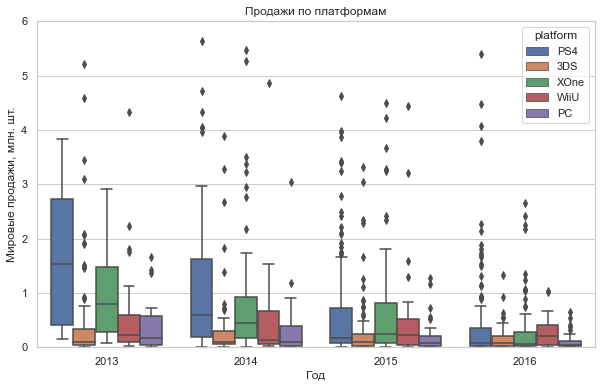

In [72]:
plt.figure(figsize =(10, 6))
sns.set(style="whitegrid")
g = sns.boxplot(
    data = actual_platform_sales, 
    x = 'year_of_release', 
    y = 'world_sales', 
    hue='platform', 
    )
plt.ylim([0,6])
plt.ylabel('Мировые продажи, млн. шт.')
plt.xlabel('Год')
plt.title('Продажи по платформам')
plt.show()

На графике мы видим больше количество выбросов. Некоторые из которых особо большие. Больше всего выбросов и самые большие продажи наблюдаются на платформе PS4. 3DS занимает последнее место по продажам, но очень сильно выбиваются выбросы. XOne отставал от PS4 в первые 2 года релиза, но в 2015 догнал. У WiiU продажи средние по этими платформам с редкими выбросами. Продаж на PC достаточно мало, как и выбросов.  

В 2013 году сильно выделяются продажи PS4, медиана находится на уровне 1,6 млн. шт. Ближайший конкурент Xbox One, имеет медиану продаж в 0,8 млн. шт. В 2014 году медианы у PS4 и Xbox One почти выравниваются с падением на уровне 0,7-0,6 млн. шт. Медианы продаж в 2015 году очень близки друг к другу. В 2016 году так же, но данные за 2016 год не полные

### Влияние отзывов пользователей и критиков на продажи.

In [73]:
### Для анализа отзывов оставим продажи по платформе PS4 и уберем пропущенные значения в отзывах.
actual_scores_ps4 = actual_platform_sales.query('critic_score > 0 and user_score > 0 and platform == "PS4"')
actual_scores_xone = actual_platform_sales.query('critic_score > 0 and user_score > 0 and platform == "XOne"')
actual_scores_3ds = actual_platform_sales.query('critic_score > 0 and user_score > 0 and platform == "3DS"')
actual_scores_wiiu = actual_platform_sales.query('critic_score > 0 and user_score > 0 and platform == "WiiU"')
actual_scores_pc = actual_platform_sales.query('critic_score > 0 and user_score > 0 and platform == "PC"')

#### Платформа - PS4

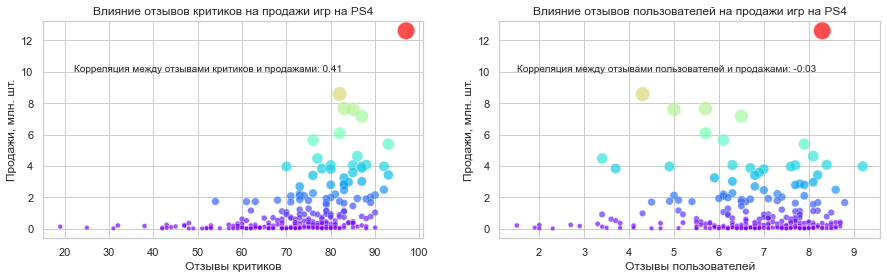

In [74]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 4))
sns.set(style='whitegrid')
sns.scatterplot(
    data = actual_scores_ps4, 
    x = 'critic_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[0],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[0].text(22, 10, 'Корреляция между отзывами критиков и продажами: {:.2f}'
      .format(actual_scores_ps4['world_sales']
      .corr(actual_scores_ps4['critic_score'])), horizontalalignment='left', size='small')
axes[0].set_ylabel('Продажи, млн. шт.')
axes[0].set_xlabel('Отзывы критиков')
axes[0].set_title('Влияние отзывов критиков на продажи игр на PS4')

sns.scatterplot(
    data = actual_scores_ps4, 
    x = 'user_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[1],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[1].text(1.5, 10, 'Корреляция между отзывами пользователей и продажами: {:.2f}'
      .format(actual_scores_ps4['world_sales']
      .corr(actual_scores_ps4['user_score'])), horizontalalignment='left', size='small')
axes[1].set_ylabel('Продажи, млн. шт.')
axes[1].set_xlabel('Отзывы пользователей')
axes[1].set_title('Влияние отзывов пользователей на продажи игр на PS4')

plt.show()

Отзывы пользователей не коррелируют с продажами игр на PS4, в то время как отзывы критиков имеют не сильную, но заметную корреляцию с продажами. Это может быть зависимость по скрытой переменной. Соответственно отзывы не влияют на продажи игр.

#### Платформа - Xbox One

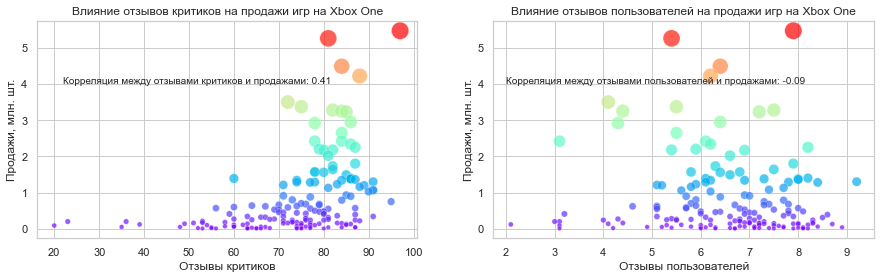

In [75]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 4))
sns.set(style='whitegrid')
sns.scatterplot(
    data = actual_scores_xone, 
    x = 'critic_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[0],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[0].text(22, 4, 'Корреляция между отзывами критиков и продажами: {:.2f}'
      .format(actual_scores_xone['world_sales']
      .corr(actual_scores_xone['critic_score'])), horizontalalignment='left', size='small')
axes[0].set_ylabel('Продажи, млн. шт.')
axes[0].set_xlabel('Отзывы критиков')
axes[0].set_title('Влияние отзывов критиков на продажи игр на Xbox One')

sns.scatterplot(
    data = actual_scores_xone, 
    x = 'user_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[1],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[1].text(2, 4, 'Корреляция между отзывами пользователей и продажами: {:.2f}'
      .format(actual_scores_xone['world_sales']
      .corr(actual_scores_xone['user_score'])), horizontalalignment='left', size='small')
axes[1].set_ylabel('Продажи, млн. шт.')
axes[1].set_xlabel('Отзывы пользователей')
axes[1].set_title('Влияние отзывов пользователей на продажи игр на Xbox One')

plt.show()

Отзывы пользователей не коррелируют с продажами игр на PS4, в то время как отзывы критиков имеют не сильную, но заметную корреляцию с продажами. Это может быть зависимость по скрытой переменной. Соответственно отзывы не влияют на продажи игр.

#### Платформа - 3DS

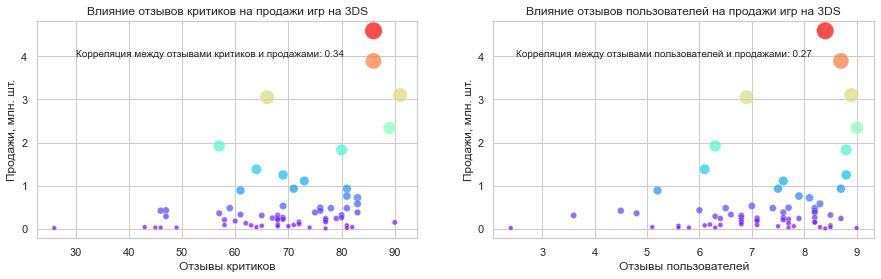

In [76]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 4))
sns.set(style='whitegrid')
sns.scatterplot(
    data = actual_scores_3ds, 
    x = 'critic_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[0],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[0].text(30, 4, 'Корреляция между отзывами критиков и продажами: {:.2f}'
      .format(actual_scores_3ds['world_sales']
      .corr(actual_scores_3ds['critic_score'])), horizontalalignment='left', size='small')
axes[0].set_ylabel('Продажи, млн. шт.')
axes[0].set_xlabel('Отзывы критиков')
axes[0].set_title('Влияние отзывов критиков на продажи игр на 3DS')

sns.scatterplot(
    data = actual_scores_3ds, 
    x = 'user_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[1],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[1].text(2.5, 4, 'Корреляция между отзывами пользователей и продажами: {:.2f}'
      .format(actual_scores_3ds['world_sales']
      .corr(actual_scores_3ds['user_score'])), horizontalalignment='left', size='small')
axes[1].set_ylabel('Продажи, млн. шт.')
axes[1].set_xlabel('Отзывы пользователей')
axes[1].set_title('Влияние отзывов пользователей на продажи игр на 3DS')

plt.show()

#### Платформа - WiiU

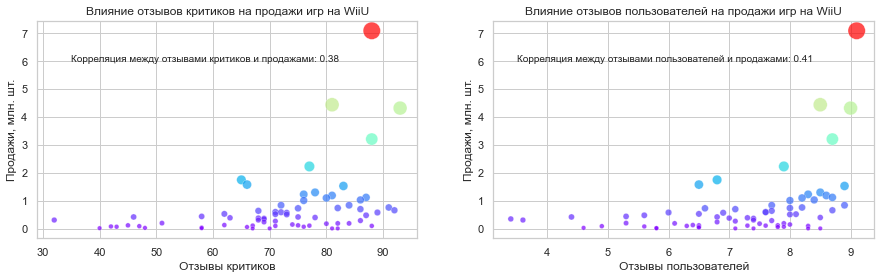

In [77]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 4))
sns.set(style='whitegrid')
sns.scatterplot(
    data = actual_scores_wiiu, 
    x = 'critic_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[0],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[0].text(35, 6, 'Корреляция между отзывами критиков и продажами: {:.2f}'
      .format(actual_scores_wiiu['world_sales']
      .corr(actual_scores_wiiu['critic_score'])), horizontalalignment='left', size='small')
axes[0].set_ylabel('Продажи, млн. шт.')
axes[0].set_xlabel('Отзывы критиков')
axes[0].set_title('Влияние отзывов критиков на продажи игр на WiiU')

sns.scatterplot(
    data = actual_scores_wiiu, 
    x = 'user_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[1],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[1].text(3.5, 6, 'Корреляция между отзывами пользователей и продажами: {:.2f}'
      .format(actual_scores_wiiu['world_sales']
      .corr(actual_scores_wiiu['user_score'])), horizontalalignment='left', size='small')
axes[1].set_ylabel('Продажи, млн. шт.')
axes[1].set_xlabel('Отзывы пользователей')
axes[1].set_title('Влияние отзывов пользователей на продажи игр на WiiU')

plt.show()

#### Платформа - PC

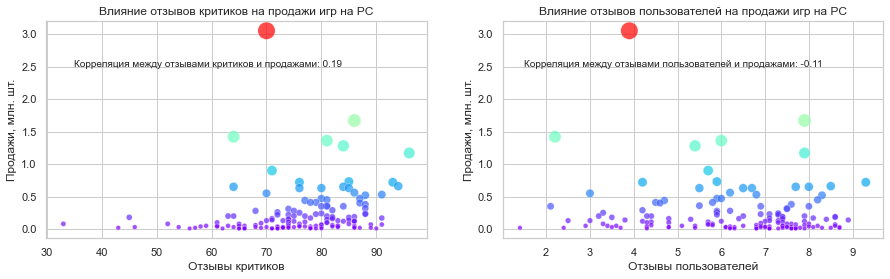

In [78]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 4))
sns.set(style='whitegrid')
sns.scatterplot(
    data = actual_scores_pc, 
    x = 'critic_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[0],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[0].text(35, 2.5, 'Корреляция между отзывами критиков и продажами: {:.2f}'
      .format(actual_scores_pc['world_sales']
      .corr(actual_scores_pc['critic_score'])), horizontalalignment='left', size='small')
axes[0].set_ylabel('Продажи, млн. шт.')
axes[0].set_xlabel('Отзывы критиков')
axes[0].set_title('Влияние отзывов критиков на продажи игр на PC')

sns.scatterplot(
    data = actual_scores_pc, 
    x = 'user_score', 
    y = 'world_sales', 
    hue='world_sales',
    size='world_sales',
    sizes=(20, 300),
    alpha=.7,
    palette='rainbow',
    ax=axes[1],
    legend=False
    )

### Посчитаем корреляцию и добавим ее на график.
axes[1].text(1.5, 2.5, 'Корреляция между отзывами пользователей и продажами: {:.2f}'
      .format(actual_scores_pc['world_sales']
      .corr(actual_scores_pc['user_score'])), horizontalalignment='left', size='small')
axes[1].set_ylabel('Продажи, млн. шт.')
axes[1].set_xlabel('Отзывы пользователей')
axes[1].set_title('Влияние отзывов пользователей на продажи игр на PC')

plt.show()

Отзывы пользователей коррелируют с продажами игр только на платформах 3DS и WiiU, возможно покупатели игр на этих платформах чаще других смотрят на отзывы, т.к. на других платформах наблюдается отрицательная корреляция. В то же время отзывы критиков имеют не сильную, но заметную корреляцию с продажами на всех платформах. Это может быть зависимость по скрытой переменной.

### Общее распределение игр по жанрам

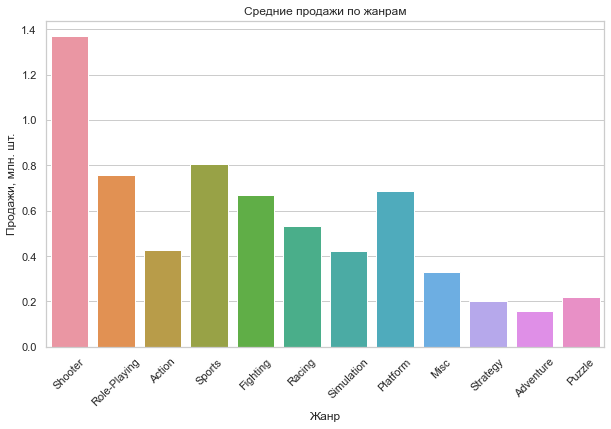

In [79]:
plt.figure(figsize =(10, 6))
sns.set(style="whitegrid")
g = sns.barplot(
    data = actual_platform_sales, 
    x = 'genre', 
    y = 'world_sales',
    ci = False,
    )
plt.setp(g.get_xticklabels(), rotation=45)
plt.ylabel('Продажи, млн. шт.')
plt.xlabel('Жанр')
plt.title('Средние продажи по жанрам')
plt.show()

In [80]:
actual_genre_sales = (actual_platform_sales.groupby('genre')['world_sales']
                      .agg(['sum', 'median', 'mean'])
                      .sort_values(by='sum', ascending=False)
                      .reset_index())
actual_genre_sales.columns = ['genre', 'sum', 'median', 'mean']

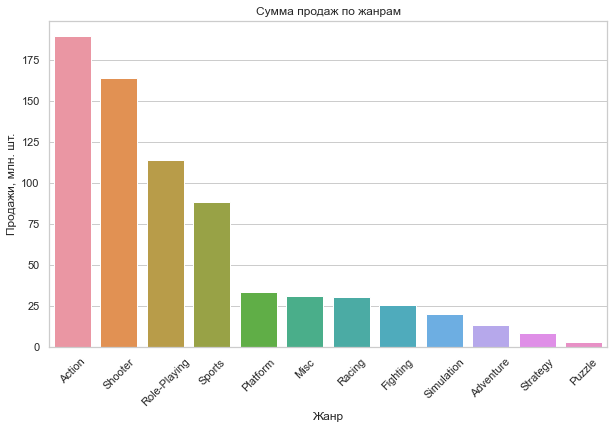

In [81]:
plt.figure(figsize =(10, 6))
sns.set(style="whitegrid")
g = sns.barplot(
    data = actual_genre_sales, 
    x = 'genre', 
    y = 'sum',
    ci = False,
    )
plt.setp(g.get_xticklabels(), rotation=45)
plt.ylabel('Продажи, млн. шт.')
plt.xlabel('Жанр')
plt.title('Сумма продаж по жанрам')
plt.show()

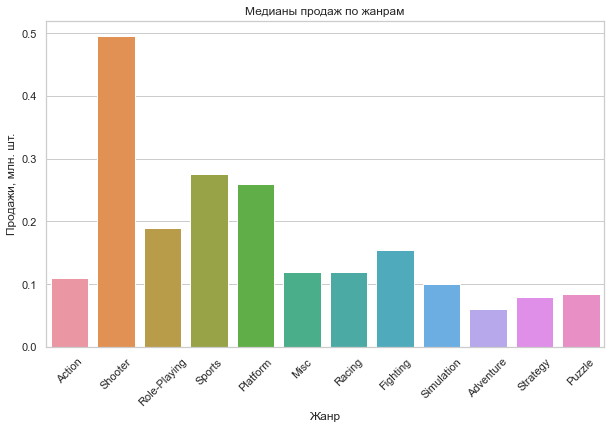

In [82]:
plt.figure(figsize =(10, 6))
sns.set(style="whitegrid")
g = sns.barplot(
    data = actual_genre_sales, 
    x = 'genre', 
    y = 'median',
    ci = False,
    )
plt.setp(g.get_xticklabels(), rotation=45)
plt.ylabel('Продажи, млн. шт.')
plt.xlabel('Жанр')
plt.title('Медианы продаж по жанрам')
plt.show()

По сумме продаж, самым продаваемым жанром являются Action. За ним идут Shooters, Role-Playing и Sport.
По средним продажам, самым продаваемым жанром являются шутеры. Они почти в два раза опережают ближайшего конкурента - спортивных игр. За ними расположились с близкими продажами Role-Playing и Platformers.
Самыми не популярными, у покупателей, жанрами оказались Adventure, Strategy и Puzzle.

## Портрет пользователя каждого региона

In [83]:
### Сделаем функцию для построения графиков для каждого региона, 
### по разным колонкам.

col_list = ['platform', 'genre', 'rating']

def my_plt(df, col, sales):
    plt.figure(figsize =(7, 5))
    sns.set(style="whitegrid")
    g = sns.barplot(
        data = df, 
        x = col, 
        y = sales,
        ci = None,
        )
    plt.ylabel('Продажи, млн. шт.')
    plt.xlabel(col)
    plt.title('Зависимость продаж от  {}'.format(col), fontsize=15)
    plt.setp(g.get_xticklabels(), rotation=45)
    plt.show()

### Портрет пользователя из Северной Америки

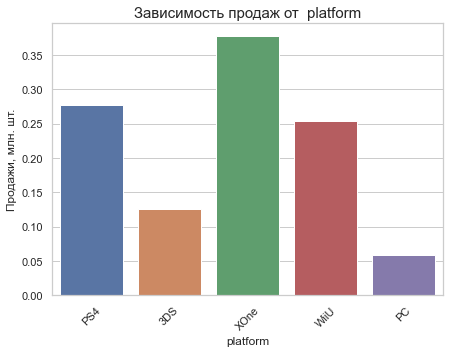

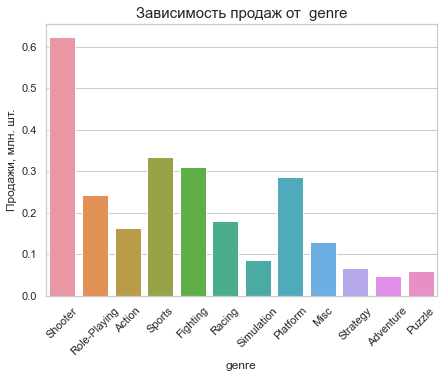

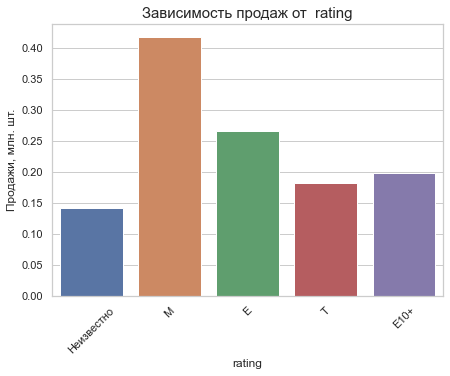

In [84]:
for i in col_list:
    my_plt(actual_platform_sales, i, 'na_sales')

В Северной Америке лидирует XOne. Самый популярный жанр - Шутеры, которые в два раза опережают ближайшие жанры Спорт и Файтинг. Больше всего в Северной Америке предпочитают игры с рейтингом М (mature, 17+), затем идут игры "для всех" - рейтинг Е (everyone, 6+). 

### Портрет пользователя из Европы

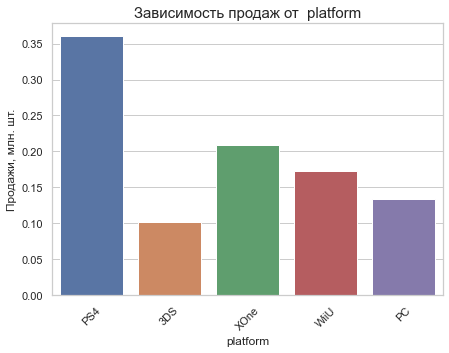

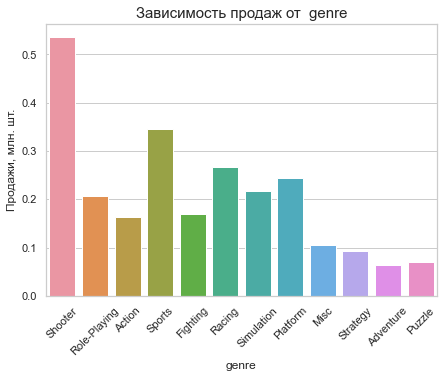

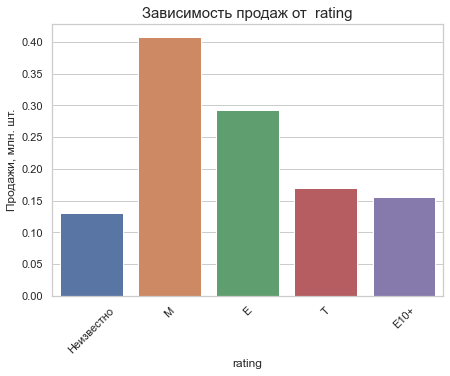

In [85]:
for i in col_list:
    my_plt(actual_platform_sales, i, 'eu_sales')

В Европе с большим отрывом лидирует платформа - PS4. Самый популярный жанр - Шутеры, на втором месте Спорт и замыкает тройку лидеров Гонки. Больше всего в Европе предпочитают игры с рейтингом М (mature, 17+), затем идут игры "для всех" - рейтинг Е (everyone, 6+). 

### Портрет пользователя из Японии

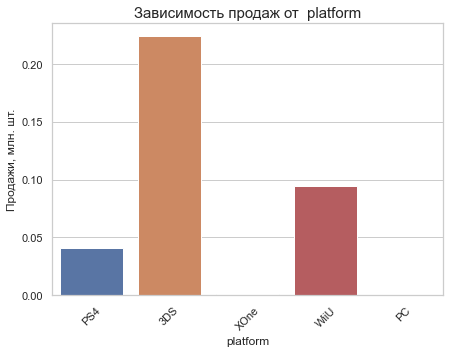

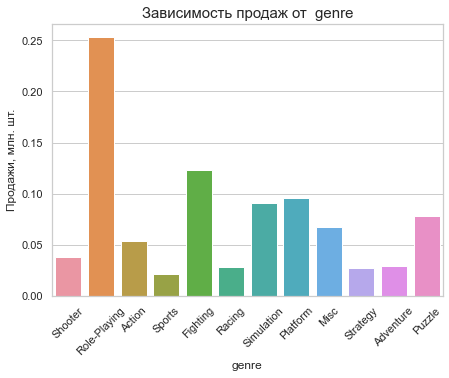

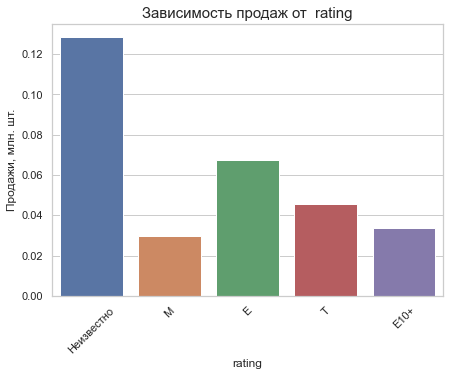

In [86]:
for i in col_list:
    my_plt(actual_platform_sales, i, 'jp_sales')

В Японии безоговорочный лидер - 3DS. Платформы PC будто вообще не существует, так же очень мало продаж XOne. Самый популярный жанр - Role-Playing, на втором месте Файтинги и третье место делят Платформеры и Симуляторы, не сильно отстают Пазлы. В Японии много местных игр, которые не сертифицируются ESRB. Больше всего предпочитают игры с рейтингом "для всех" - рейтинг Е (everyone, 6+), затем идут игры "подростков" - рейтинг Т (everyone, 13+). 

## Проверка гипотез

### Средние пользовательские оценки платформ Xbox One и PC равны.

Нулевая гипотеза - равенство средних пользовательских отзывов. Альтернативная гипотеза - средние пользовательские отзывы различны.

In [87]:
### Оставим только значения XOne и PC и уберем пропущенные значения оценок.
xone_scores = actual_platform_sales[['platform', 'user_score']].query('platform == "XOne" and user_score > 0')
pc_scores = actual_platform_sales[['platform', 'user_score']].query('platform == "PC" and user_score > 0')

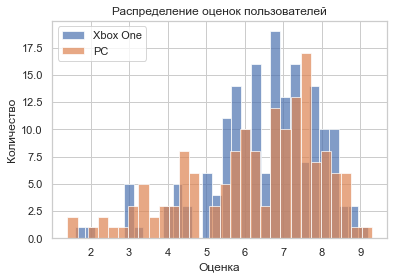

In [88]:
sns.set(style="whitegrid")
plt.hist(data = xone_scores,
         x='user_score',
         bins = 30,
         alpha = 0.7,
         label='Xbox One')

plt.hist(data = pc_scores,
         x='user_score',
         bins = 30,
         alpha = 0.7,
         label='PC')

plt.ylabel('Количество')
plt.xlabel('Оценка')
plt.title('Распределение оценок пользователей')
plt.legend()
plt.show()

In [89]:
### Проведем тест Стьюдента на равенство средних
### двух выборок с одинаковыми дисперсиями. 

alpha = 0.05

results = st.ttest_ind(
    xone_scores['user_score'],
    pc_scores['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Исходя из p-значения не отвергаем нулевую гипотезу. Средние оценки пользователей Xbox One и PC равны.

### Средние пользовательские оценки жанров Action и Sports равны.

Нулевая гипотеза - равенство средних пользовательских отзывов. Альтернативная гипотеза - средние пользовательские отзывы различны.

In [90]:
### Оставим только данные жанров Action и Sports и уберем пропущенные значения оценок.
action = actual_platform_sales[['genre', 'user_score']].query('genre == "Action" and user_score > 0')
sports = actual_platform_sales[['genre', 'user_score']].query('genre == "Sports" and user_score > 0')

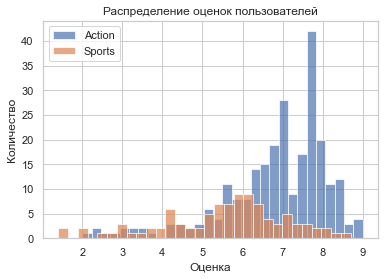

In [91]:
sns.set(style="whitegrid")
plt.hist(data = action,
         x='user_score',
         bins = 30,
         alpha = 0.7,
         label='Action')

plt.hist(data = sports,
         x='user_score',
         bins = 30,
         alpha = 0.7,
         label='Sports')

plt.ylabel('Количество')
plt.xlabel('Оценка')
plt.title('Распределение оценок пользователей')
plt.legend()
plt.show()

In [92]:
### Проведем тест Стьюдента на равенство средних
### двух выборок с разными дисперсиями. 

alpha = 0.05

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  6.954390687344239e-11
Отвергаем нулевую гипотезу


Исходя из p-значения отвергаем нулевую гипотезу. Средние оценки пользователей в жанрах Action и Sports различны.

## Вывод

Пик продаж приходится примерно на пятый год существования платформы. Соответственно время жизни примерно 8 лет.

Наиболее привлекательные платформы на 2017 год: PS4, XOne, WiiU, 3DS и PC.

Самые большие продажи наблюдаются на платформе PS4, и это только в первые 2 года существования платформы, ее пик придется на 2017-2018 годы. 3DS занимает последнее место по продажам, но очень сильно выбиваются выбросы, демонстрирующие сильную популярность отдельных игр, приносящие огромный доход. XOne отставал от PS4 в первые 2 года релиза, но в 2015 догнал. У WiiU продажи средние по этими платформам с редкими выбросами. Продаж на PC достаточно мало, как и выбросов, но эта платформа пользуется стабильным спросом на протяжении многих лет. PC не подвержен угасанию.

Отзывы пользователей коррелируют с продажами игр только на платформах 3DS и WiiU, возможно покупатели игр на этих платформах чаще других смотрят на отзывы, т.к. на других платформах наблюдается отрицательная корреляция. В то же время отзывы критиков имеют не сильную, но заметную корреляцию с продажами на всех платформах. Это может быть зависимость по скрытой переменной.

По сумме продаж, самым продаваемым жанром являются Action. За ним идут Shooters, Role-Playing и Sport.
По средним продажам, самым продаваемым жанром являются шутеры. Они почти в два раза опережают ближайшего конкурента - спортивных игр. За ними расположились с близкими продажами Role-Playing и Platformers.

Самыми не популярными, у покупателей, жанрами оказались Adventure, Strategy и Puzzle.

На разных рынках стоит по разному планировать рекламные кампании. 

Для Северной Америки и Европы кампании будут похожи, с отличием в платформе - Xbox One и PS4 соответственно. При этом самый популярный жанр для обоих рынков - Shooters, на него и стоит делать акцент, не забывая о ближайших преследователях Sports, Fighting и Racing. Наиболее востребованные игры с рейтингом ESRB - M (mature, 17+), за ним идет E (everyone, 6+).

Рынок Японии очень сильно отличается от рынков Северной Америки и Европы, для него необходимо планировать рекламные кампании отдельно, и потенциально успешный продукт будет отличаться. В Японии безоговорочный лидер - 3DS. Платформы PC будто вообще не существует, так же очень мало продаж Xbox One. Самый популярный жанр - Role-Playing, на втором месте Fighting и третье место делят Platformers и Simulation, не сильно отстают Puzzle. В Японии много местных игр, которые не сертифицируются ESRB. Больше всего предпочитают игры с рейтингом "для всех" - рейтинг Е (everyone, 6+), затем идут игры "подростков" - рейтинг Т (everyone, 13+).